# Learning rate, Evaluation

## Training and Test datasets

In [4]:
import tensorflow as tf

x_data = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) +b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X:x_data, Y:y_data})
        if step % 20 == 0:
            print(step, cost_val, W_val)
        
    # predict
    print("Prediction: ", sess.run(prediction, feed_dict = {X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict = {X:x_test, Y: y_test}))

0 2.6437182 [[ 1.6164407   0.35159314 -0.54730886]
 [ 0.26799688 -0.86443686 -1.3842125 ]
 [-0.98051786 -0.1299563   0.5812885 ]]
20 1.3151286 [[ 1.4203331   0.21971405 -0.21932222]
 [-0.02554411 -0.890712   -1.0643963 ]
 [-0.7123943  -0.06478579  0.24799442]]
40 1.0697334 [[ 1.2603878   0.08516014  0.07517686]
 [-0.21238121 -0.882714   -0.885557  ]
 [-0.45425683 -0.03107127 -0.04385751]]
60 0.9142951 [[ 1.1231289  -0.03152284  0.32911888]
 [-0.3427805  -0.8543336  -0.78353804]
 [-0.26155642 -0.01421113 -0.25341797]]
80 0.818159 [[ 1.0020096  -0.12389229  0.5426078 ]
 [-0.42555276 -0.82282245 -0.7322769 ]
 [-0.12500836 -0.00535078 -0.3988263 ]]
100 0.75567305 [[ 8.9168543e-01 -1.9420117e-01  7.2324085e-01]
 [-4.7397155e-01 -7.9582793e-01 -7.1085256e-01]
 [-2.9064763e-02  5.8136717e-04 -5.0070196e-01]]
120 0.71176887 [[ 0.7890849  -0.24712224  0.8787624 ]
 [-0.5002476  -0.7745553  -0.70584893]
 [ 0.04034263  0.00537906 -0.5749068 ]]
140 0.67865026 [[ 0.6925545  -0.2869321   1.0151026 ]


## Learning rate - (1) Big learning rate <br>

cost 값이 inf로 발산 (overshooting)

In [5]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) +b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1.5).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X:x_data, Y:y_data})
        if step % 20 == 0:
            print(step, cost_val, W_val)
        
    # predict
    print("Prediction: ", sess.run(prediction, feed_dict = {X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict = {X:x_test, Y: y_test}))

0 4.702512 [[-0.26601616 -1.9255261   0.45276666]
 [-2.5634222   1.3529696  -0.34482735]
 [-2.6238728   2.7689817   0.28742105]]
20 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
40 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
60 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
80 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
100 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
120 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
140 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
160 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
180 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
200 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Prediction:  [0 0 0]
Accuracy:  0.0


## Learning rate - (2) Small learning rate <br>

수렴 속도가 매우 느리거나, local minima에 빠질 수 있음

In [6]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) +b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X:x_data, Y:y_data})
        if step % 20 == 0:
            print(step, cost_val, W_val)
        
    # predict
    print("Prediction: ", sess.run(prediction, feed_dict = {X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict = {X:x_test, Y: y_test}))

0 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 ]
 [-0.7138933   0.39611277 -0.80714494]]
20 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 ]
 [-0.7138933   0.39611277 -0.80714494]]
40 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 ]
 [-0.7138933   0.39611277 -0.80714494]]
60 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 ]
 [-0.7138933   0.39611277 -0.80714494]]
80 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 ]
 [-0.7138933   0.39611277 -0.80714494]]
100 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 ]
 [-0.7138933   0.39611277 -0.80714494]]
120 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 ]
 [-0.7138933   0.39611277 -0.80714494]]
140 6.006279 [[-0.10332307  0.4034278  -0.2573104 ]
 [ 0.7078875   1.1741198  -1.1441443 

## Normalize - (1) Non-normalized inputs

#### np.array() : array 생성

In [14]:
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
              [816, 820.958984, 1008100, 815.48999, 819.23999],
              [819.359985, 823, 1188100, 818.469971, 818.97998],
              [819, 823, 1198100, 816, 820.450012],
              [811.700012, 815.25, 1098100, 809.780029, 813.669983],
              [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
       [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if 0<=step<=10:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  2772009000000.0 
Prediction:
 [[1174778. ]
 [2365657. ]
 [1860832.8]
 [1304231.1]
 [1537227.1]
 [1550171.6]
 [1420735.1]
 [1809061.8]]
1 Cost:  3.045552e+27 
Prediction:
 [[-3.8928199e+13]
 [-7.8366460e+13]
 [-6.1648061e+13]
 [-4.3214963e+13]
 [-5.0931144e+13]
 [-5.1359819e+13]
 [-4.7073055e+13]
 [-5.9933354e+13]]
2 Cost:  inf 
Prediction:
 [[1.2903275e+21]
 [2.5975617e+21]
 [2.0434081e+21]
 [1.4324181e+21]
 [1.6881814e+21]
 [1.7023905e+21]
 [1.5602998e+21]
 [1.9865719e+21]]
3 Cost:  inf 
Prediction:
 [[-4.2769647e+28]
 [-8.6099697e+28]
 [-6.7731519e+28]
 [-4.7479433e+28]
 [-5.5957049e+28]
 [-5.6428029e+28]
 [-5.1718243e+28]
 [-6.5847602e+28]]
4 Cost:  inf 
Prediction:
 [[1.4176579e+36]
 [2.8538910e+36]
 [2.2450528e+36]
 [1.5737702e+36]
 [1.8547722e+36]
 [1.8703834e+36]
 [1.7142712e+36]
 [2.1826080e+36]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

## Normalize - (2) Normalized inputs (min-max scale)

#### from sklearn.preprocessing import MinMaxScaler <br>
#### MinMaxScaler()  : min-max scale <br>
#### fit_transform() :  fit과 transform을 한번에 수행
(https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models)

In [23]:
from sklearn.preprocessing import MinMaxScaler 

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
              [816, 820.958984, 1008100, 815.48999, 819.23999],
              [819.359985, 823, 1188100, 818.469971, 818.97998],
              [819, 823, 1198100, 816, 820.450012],
              [811.700012, 815.25, 1098100, 809.780029, 813.669983],
              [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
xy = MinMaxScaler().fit_transform(xy)

print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
       [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 500 ==0 :
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  0.2038711 
Prediction:
 [[0.22432426]
 [1.4709677 ]
 [0.79694486]
 [0.09787324]
 [0.3766752 ]
 [0.42906177]
 [0.08256976]
 [0.69036794]]
500 Cost:  0.20338577 
Prediction:
 [[0.2257585 ]
 [1.470688  ]
 [0.79694986]
 [0.09817822]
 [0.3769567 ]
 [0.42925748]
 [0.08234531]
 [0.6895757 ]]
1000 Cost:  0.20290121 
Prediction:
 [[0.22719273]
 [1.4704084 ]
 [0.79695475]
 [0.09848319]
 [0.3772382 ]
 [0.4294532 ]
 [0.08212084]
 [0.68878347]]
1500 Cost:  0.20241834 
Prediction:
 [[0.22861463]
 [1.4701194 ]
 [0.79695165]
 [0.0987819

# MNIST data

#### from tensorflow.examples.tutorials.mnist import input_data
#### input_data.read_data_sets() : mnist data sets 읽기 <br>

#### mnist.train.next_batch() : 다음 batch를 가져옴 <br><br>

#### accuracy.eval(session=sess, ) : sess.run(accuracy) <br><br>

#### import matplotlib.pyplot as plt 
#### plt.imshow() : Display an image, i.e. data on a 2D regular raster. <br><br>

#### import random
#### random.randint() : random int 생성

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.527230883
Epoch: 0002, Cost: 1.077644026
Epoch: 0003, Cost: 0.868696794
Epoch: 0004, Cost: 0.763737372
Epoch: 0005, Cost: 0.697155176
Epoch: 0006, Cost: 0.649520282
Epoch: 0007, Cost: 0.613696377
Epoch: 0008, Cost: 0.584700517
Epoch: 0009, Cost: 0.560351812
Epoch: 0010, Cost: 0.539902680
Epoch: 0011, Cost: 0.522724563
Epoch: 0012, Cost: 0.506899691
Epoch: 0013, Cost: 0.493836051
Epoch: 0014, Cost: 0.481988384
Epoch: 0015, Cost: 0.470796883
Learning finished
Accuracy:  0.8895
Label: [3]
Prediction: [3]


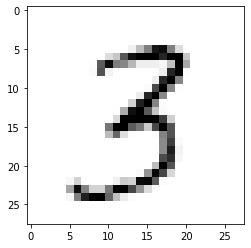

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")
    

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()